<a href="https://colab.research.google.com/github/AtharvaSC03/ML-Projects/blob/main/Crop_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Libraries

In [2]:
# pip install pandas scikit-learn

# Get Dataset

In [1]:
# https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

# Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

# Context
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

# Data fields
## *N* - ratio of Nitrogen content in soil
## *P* - ratio of Phosphorous content in soil
##*K* - ratio of Potassium content in soil
##*temperature* - temperature in degree Celsius
##*humidity* - relative humidity in %
##*ph* - ph value of the soil
##*rainfall* - rainfall in mm

# Import dependencies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Dataset

In [4]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
df1 = df.copy()

In [18]:
label_encoder = LabelEncoder()
df1['label'] = label_encoder.fit_transform(df1['label'])

In [21]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


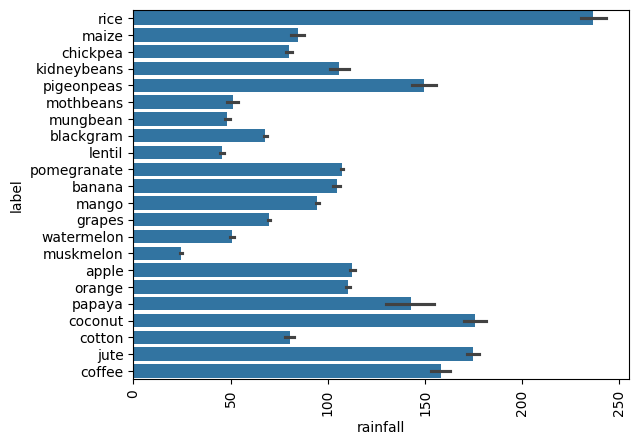

In [28]:
sns.barplot(x = 'rainfall',y = 'label',data = df)
plt.xticks(rotation = 90)
plt.show()

In [19]:
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [20]:
df1.value_counts('label')

,count
label,
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100


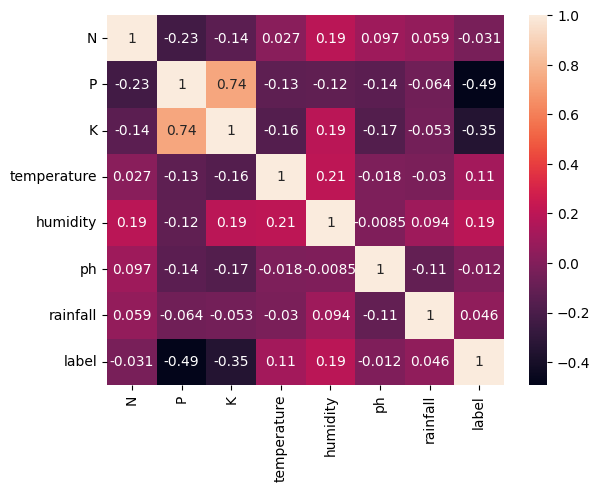

In [22]:
sns.heatmap(df1.corr(),annot = True)
plt.show()

# Features (X) and Target (y)

In [40]:
x = df.drop('label',axis = 1)
y = df['label']

# Split into training & testing sets

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Create and train model

In [42]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Make predictions

In [43]:
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

# Evaluate

In [44]:
print('Accuracy rate of train :- ',accuracy_score(y_train,y_pred_train))
print('Accuracy rate of test :- ',accuracy_score(y_test,y_pred_test))

Accuracy rate of train :-  1.0
Accuracy rate of test :-  0.9931818181818182


In [45]:
from sklearn.metrics import classification_report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_test))


📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
 

#Test with custom input

In [48]:
sample = x_train.iloc[0].values.reshape(1, -1)
predict_crop = rfc.predict(sample)
print(f"\n🌾 Recommended Crop: {predict_crop[0]}")


🌾 Recommended Crop: orange


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
